# Dignitas U.S. PayPal Donations Analytics

In [127]:
import pandas as pd

df = pd.read_excel('PayPal_depleted_to_Apr23.xlsx', sheet_name='Download (14)')
df = df.fillna('Not specified')
# print whole sheet data
df[['Date', 'Net', 'Country']]

,Date,Net,Country
0,2023-02-27,9.70,United States
1,2023-03-03,48.50,United States
2,2023-03-06,24.25,United States
3,2023-03-09,3246.41,United Kingdom
4,2023-03-10,10.11,Not specified
...,...,...,...
155,2023-04-23,9.16,Germany
156,2023-04-23,295.40,Switzerland
157,2023-04-23,9.15,Ukraine
158,2023-04-23,100.00,United States


## Totally raised

In [45]:
df['Net'].sum()

19854.54

## Median donation amount

In [44]:
round(df['Net'].median(), 2)

48.86

## Median daily donation amount

In [60]:
round(df['Net'].groupby(df['Date'].dt.to_period('D')).sum().median(), 2)

158.84

## Donations by date

<Axes: xlabel='Date'>

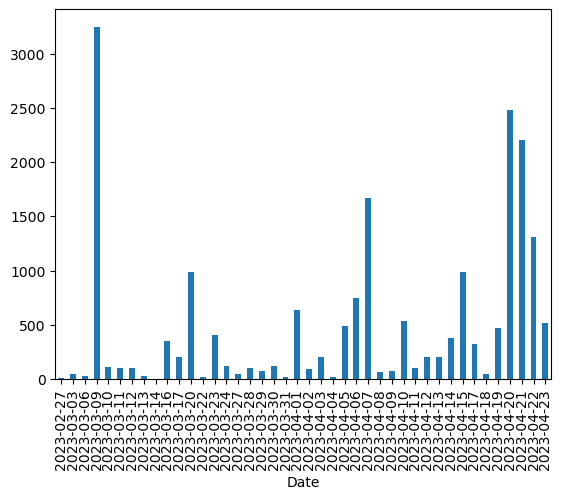

In [54]:
df['Net'].groupby(df['Date'].dt.to_period('D')).sum().plot(kind='bar')

## Contributions by country

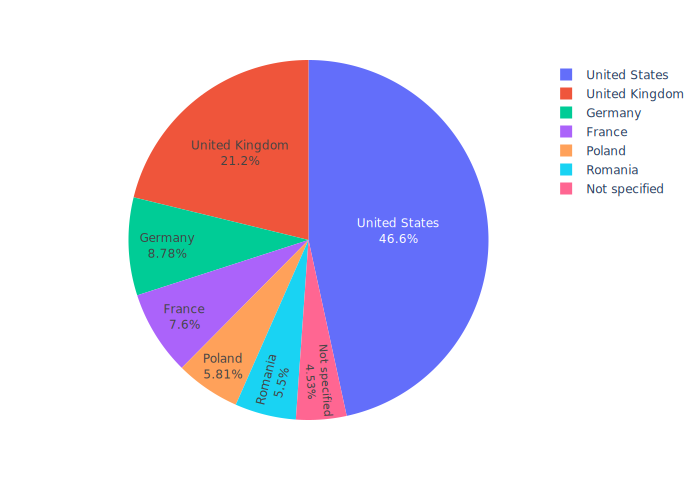

In [128]:
import plotly.io as pio
pio.renderers 
import plotly.express as px

df_country = df.groupby(df['Country'])['Net'].sum().sort_values(ascending=False).head(7).reset_index(name='Net')
fig = px.pie(df_country, values = 'Net', names = 'Country', labels = "Country")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer='svg')


## Weekly amounts

<Axes: xlabel='Date'>

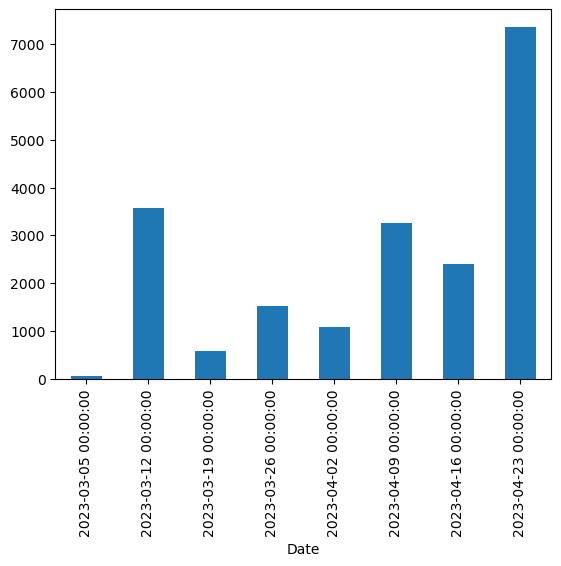

In [23]:
df_w = df.groupby([pd.Grouper(key='Date', freq='W')])['Net'].sum()
df_w.plot(kind = 'bar')

## Cumulatively raised

<Axes: xlabel='Date'>

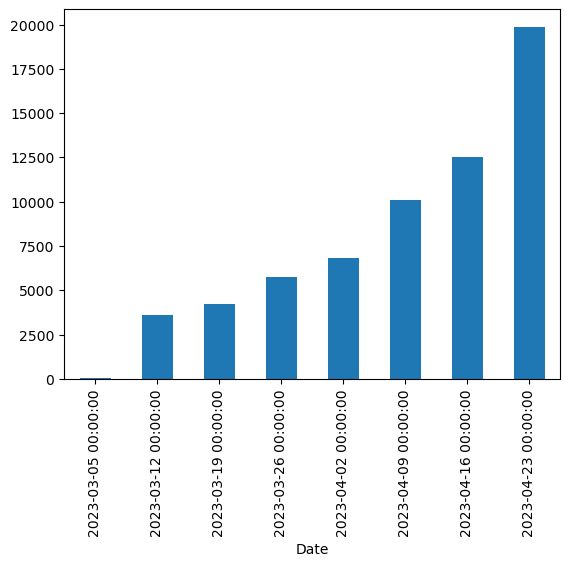

In [31]:
df_w.cumsum().plot(kind = 'bar')

## Donations since Madyar's publications

<Axes: xlabel='Date'>

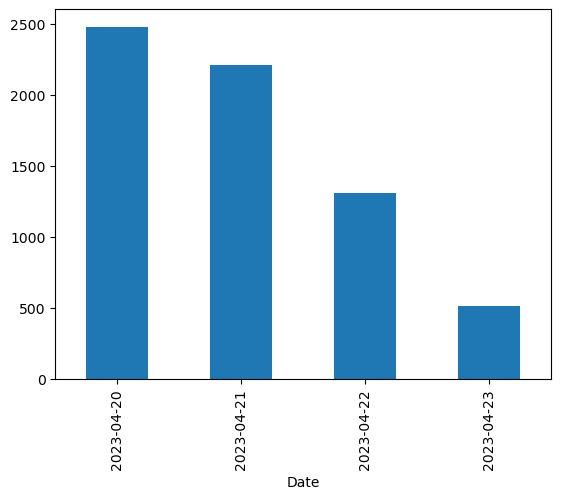

In [57]:
df_Madyar = df.loc[df['Date'] >= '2023-04-20']
df_Madyar['Net'].groupby(df_Madyar['Date'].dt.to_period('D')).sum().plot(kind='bar')